In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:

card_df = pd.read_csv("/Users/carlosito/Library/CloudStorage/OneDrive-Personal/AIT material/DANIclass/2-Iot/Project/code/CC GENERAL.csv")
card_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [417]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [324]:
card_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Figure size 100x100 with 0 Axes>

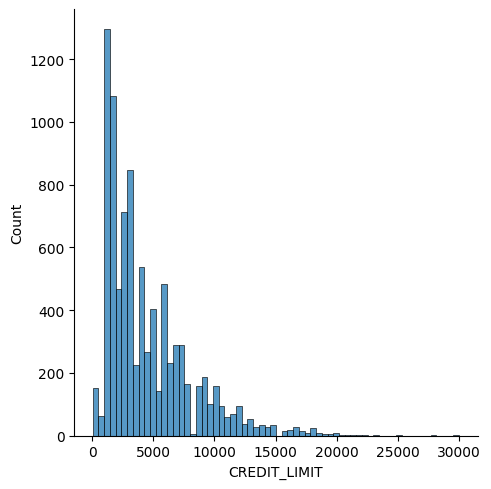

In [335]:
plt.figure(figsize=  (1,1))
sns.displot(card_df.CREDIT_LIMIT)

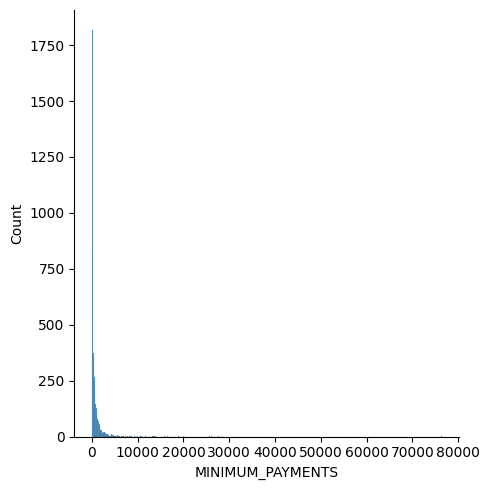

In [330]:
sns.displot(card_df.MINIMUM_PAYMENTS)

In [5]:
card_df.MINIMUM_PAYMENTS = card_df.MINIMUM_PAYMENTS.fillna(card_df.MINIMUM_PAYMENTS.mean())
card_df.CREDIT_LIMIT = card_df.CREDIT_LIMIT.fillna(card_df.CREDIT_LIMIT.mean())

In [6]:
card_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot: >

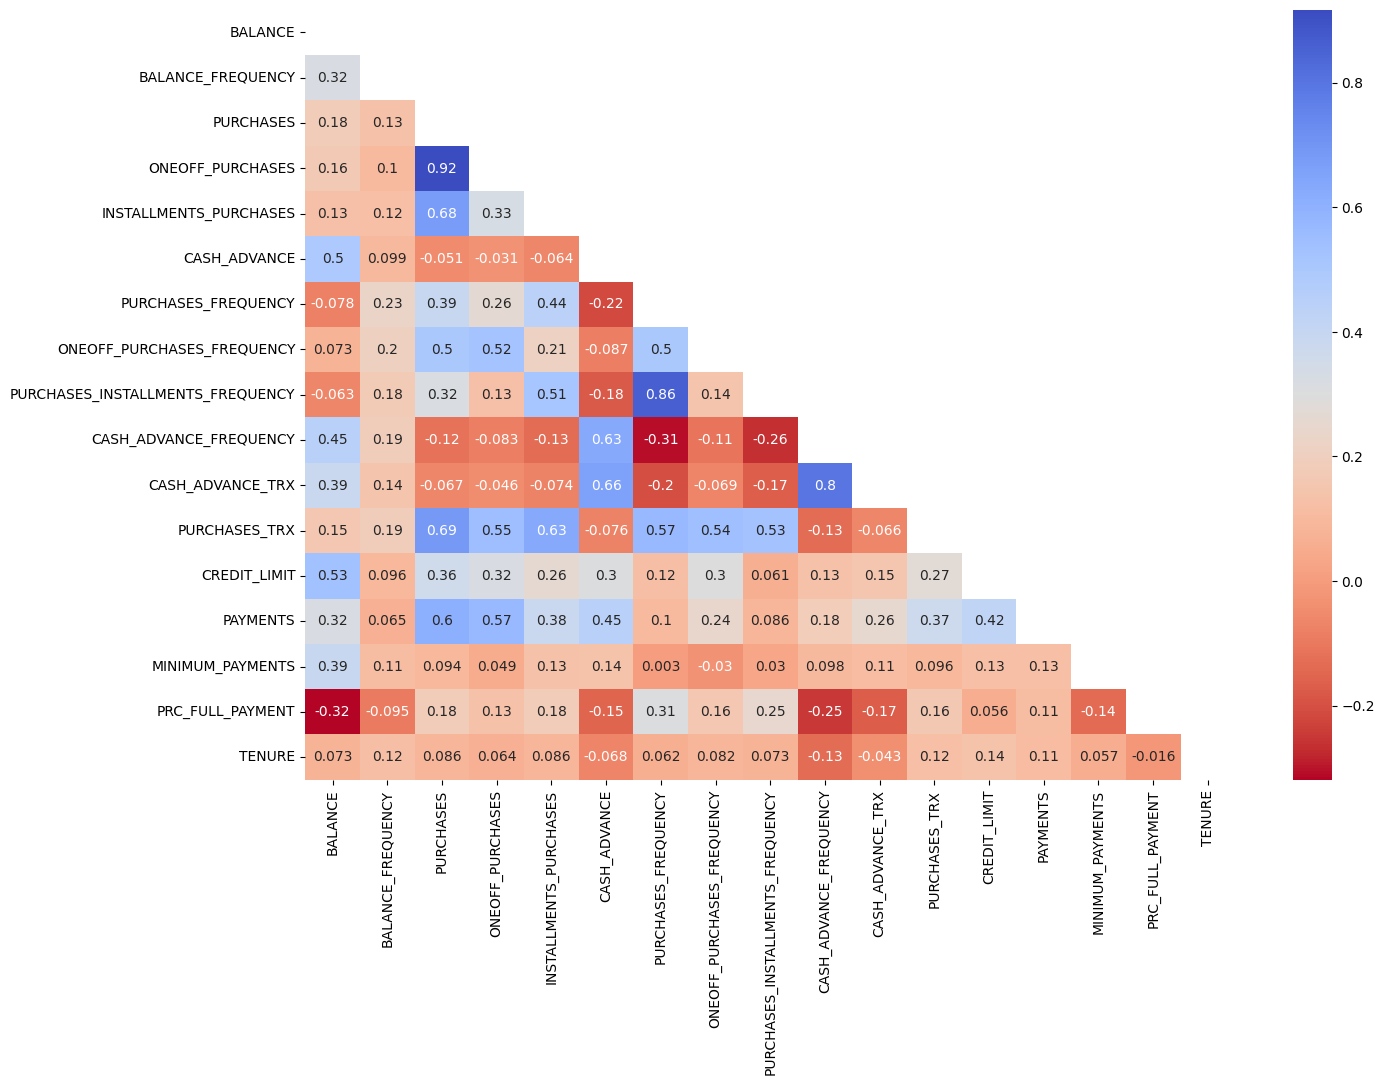

In [16]:
mask = np.triu(np.ones_like(card_df.corr(numeric_only=True), dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(card_df.corr(numeric_only=True), mask=mask, annot=True, cmap='coolwarm_r')

In [336]:
card_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

<AxesSubplot: >

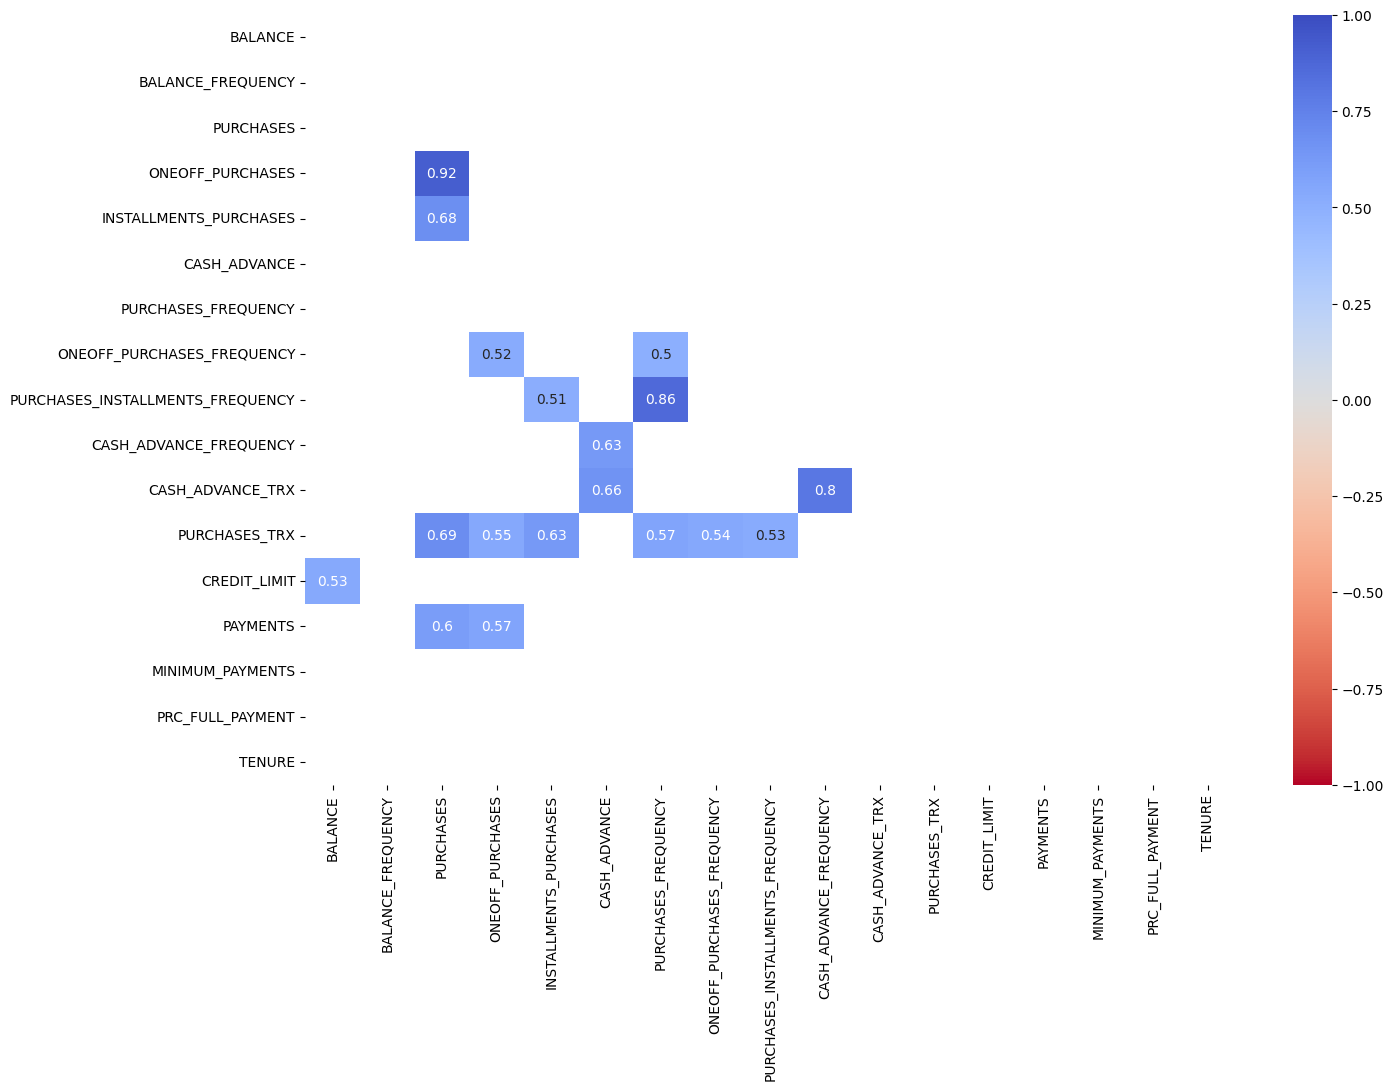

In [24]:
corr = card_df.corr(numeric_only=True)
corr_modified = corr[np.abs(corr) >= 0.5]
mask = np.triu(np.ones_like(card_df.corr(numeric_only=True), dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(corr_modified, mask=mask, annot=True, cmap='coolwarm_r', vmin=-1, vmax=1)

In [30]:
card_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

<AxesSubplot: >

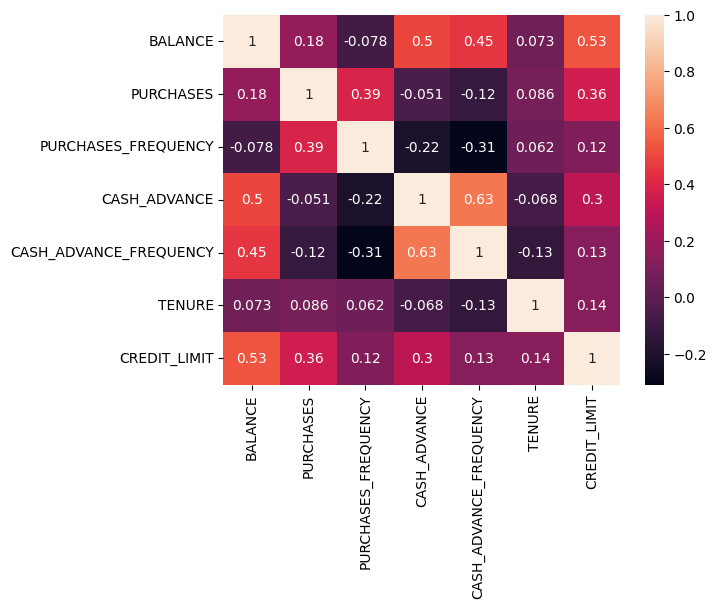

In [41]:
needed_cols = ["BALANCE", "PURCHASES", "PURCHASES_FREQUENCY", "CASH_ADVANCE", "CASH_ADVANCE_FREQUENCY", "TENURE", "CREDIT_LIMIT"]
sns.heatmap(card_df[needed_cols].corr(),annot=True)

In [338]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [319]:
hier_clustering = AgglomerativeClustering()
hier_clustering.fit(new_card_df)

AgglomerativeClustering()

In [68]:
new_card_df = card_df[needed_cols]

In [179]:
Q1 =new_card_df.BALANCE.quantile(0.25)
Q3 = new_card_df.BALANCE.quantile(0.75)
IQR = Q3-Q1
print(Q3, Q1, IQR)

2054.1400355 128.2819155 1925.85812


In [183]:
new_card_df[(new_card_df['BALANCE'] > (Q3 + (1.5* IQR))) |  (new_card_df['BALANCE'] < 128) ]

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CASH_ADVANCE  \
0       40.900749      95.40             0.166667      0.000000   
15    6886.213231    1611.70             0.500000   2301.491267   
17      41.089489     519.00             0.416667      0.000000   
21    6369.531318    6359.95             1.000000    229.028245   
24    5368.571219       0.00             0.000000    798.949863   
...           ...        ...                  ...           ...   
8943     5.871712      20.90             0.166667      0.000000   
8945    28.493517     291.12             1.000000      0.000000   
8946    19.183215     300.00             1.000000      0.000000   
8947    23.398673     144.40             0.833333      0.000000   
8948    13.457564       0.00             0.000000     36.558778   

      CASH_ADVANCE_FREQUENCY  TENURE  CREDIT_LIMIT  
0                   0.000000      12        1000.0  
15                  0.166667      12        8000.0  
17                  0.000000      12        2500.0  
21                  0.333333      12       11250.0  
24                  0.363636      11        6000.0  
...                      ...     ...           ...  
8943                0.000000       6         500.0  
8945                0.000000       6        1000.0  
8946                0.000000       6        1000.0  
8947                0.000000       6        1000.0  
8948                0.166667       6         500.0  

[2931 rows x 7 columns]

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'BALANCE'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'PURCHASES_FREQUENCY'),
  Text(4, 0, 'CASH_ADVANCE'),
  Text(5, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(6, 0, 'TENURE'),
  Text(7, 0, 'CREDIT_LIMIT')])

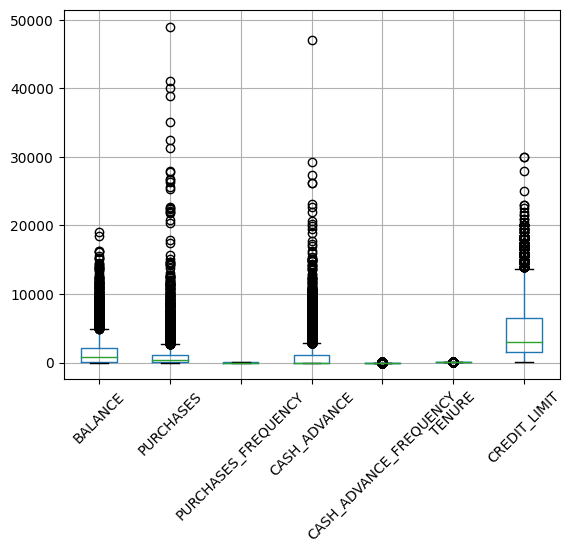

In [416]:
new_card_df.boxplot()
plt.xticks(rotation = 45)


In [67]:
scaler = StandardScaler()
scaled_card_df = pd.DataFrame(scaler.fit_transform(new_card_df), columns=new_card_df.columns)
scaled_card_df.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CASH_ADVANCE  \
0 -0.731989  -0.424900            -0.806490     -0.466786   
1  0.786961  -0.469552            -1.221758      2.605605   
2  0.447135  -0.107668             1.269843     -0.466786   
3  0.049099   0.232058            -1.014125     -0.368653   
4 -0.358775  -0.462063            -1.014125     -0.466786   

   CASH_ADVANCE_FREQUENCY   TENURE  CREDIT_LIMIT  
0               -0.675349  0.36068     -0.960433  
1                0.573963  0.36068      0.688639  
2               -0.675349  0.36068      0.826062  
3               -0.258913  0.36068      0.826062  
4               -0.675349  0.36068     -0.905464

In [313]:
pca = PCA()
pca.fit(scaled_card_df)
pca.explained_variance_ratio_

array([0.3360083 , 0.25224476, 0.14115919, 0.0890874 , 0.07655499,
       0.0585795 , 0.04636585])

In [317]:
pca.explained_variance_ratio_[:4].sum()


0.8184996573680412

Text(0, 0.5, 'Cumulative Explained Variance')

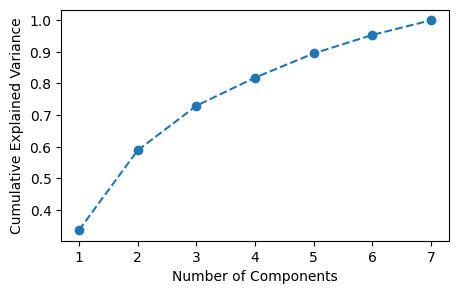

In [70]:
plt.figure(figsize=(5,3))
plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

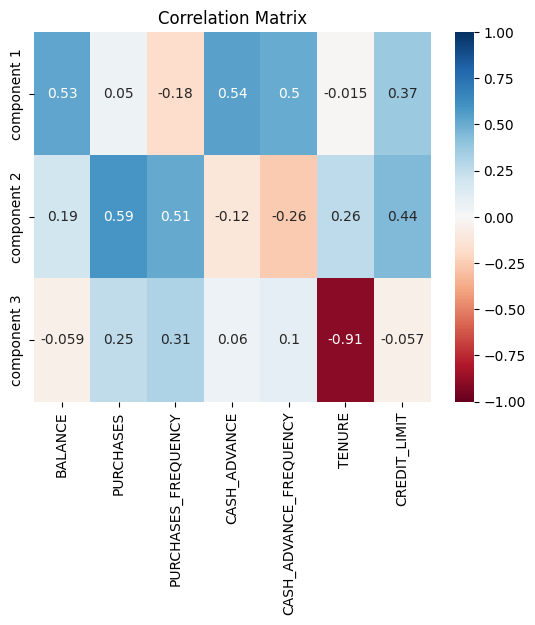

In [337]:
pca = PCA(n_components=3)
pca.fit(scaled_card_df)

df_pca_components = pd.DataFrame(
    data=pca.components_.round(4),
    columns=scaled_card_df.columns.values,
    index=['component 1', 'component 2', 'component 3'])

s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

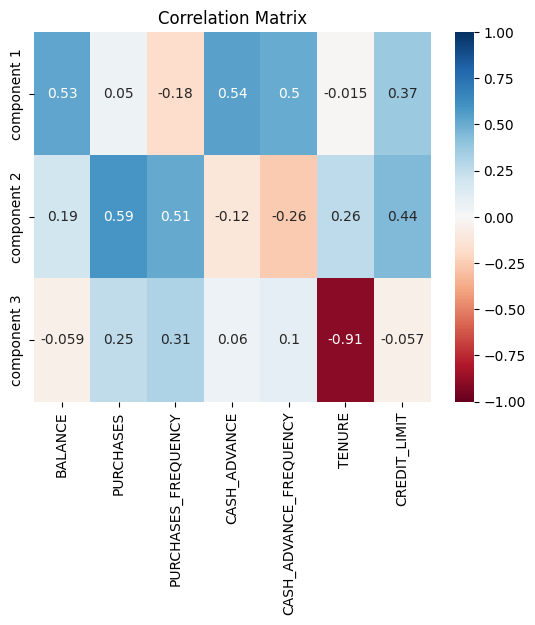

In [127]:
pca = PCA(n_components=3)
pca.fit(scaled_card_df)

df_pca_components = pd.DataFrame(
    data=pca.components_.round(4),
    columns=scaled_card_df.columns.values,
    index=['component 1', 'component 2', 'component 3'])

s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

In [128]:
pca.components_.round(4)

array([[ 0.5287,  0.0498, -0.1843,  0.5401,  0.5025, -0.0152,  0.3737],
       [ 0.1891,  0.5937,  0.5146, -0.1223, -0.2589,  0.2626,  0.4428],
       [-0.0595,  0.2506,  0.3094,  0.0601,  0.1015, -0.906 , -0.0569]])

In [129]:
scaled_card_df

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CASH_ADVANCE  \
0    -0.731989  -0.424900            -0.806490     -0.466786   
1     0.786961  -0.469552            -1.221758      2.605605   
2     0.447135  -0.107668             1.269843     -0.466786   
3     0.049099   0.232058            -1.014125     -0.368653   
4    -0.358775  -0.462063            -1.014125     -0.466786   
...        ...        ...                  ...           ...   
8945 -0.737950  -0.333293             1.269843     -0.466786   
8946 -0.742423  -0.329136             1.269843     -0.466786   
8947 -0.740398  -0.401965             0.854576     -0.466786   
8948 -0.745174  -0.469552            -1.221758     -0.449352   
8949 -0.572575   0.042146             0.439310     -0.406205   

      CASH_ADVANCE_FREQUENCY    TENURE  CREDIT_LIMIT  
0                  -0.675349  0.360680     -0.960433  
1                   0.573963  0.360680      0.688639  
2                  -0.675349  0.360680      0.826062  
3                  -0.258913  0.360680      0.826062  
4                  -0.675349  0.360680     -0.905464  
...                      ...       ...           ...  
8945               -0.675349 -4.122768     -0.960433  
8946               -0.675349 -4.122768     -0.960433  
8947               -0.675349 -4.122768     -0.960433  
8948                0.157527 -4.122768     -1.097856  
8949                0.990398 -4.122768     -0.905464  

[8950 rows x 7 columns]

In [340]:
pca_scores

array([[-1.21531644, -0.90427882, -0.68118408],
       [ 2.56535755, -0.82616777, -0.69350601],
       [-0.29129579,  1.36642327, -0.13115006],
       ...,
       [-1.45659054, -1.21484628,  3.90080234],
       [-0.70317485, -2.60289213,  3.33524821],
       [-0.37893   , -1.54747703,  4.04330717]])

In [342]:
len(set(kmeans_pca.labels_))

1

In [343]:
pca_scores = pca.transform(scaled_card_df)

results = {}
dv_score_set = []
for i in range(2, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)   # pca_scores are standarzied by default
    results[i] = kmeans_pca.inertia_
    dv_score = davies_bouldin_score(X = pca_scores, labels = kmeans_pca.labels_)
    dv_score_set.append(dv_score)
    

In [344]:
dv_score_set

[1.1264871645353964,
 0.9520974803053136,
 0.8781067834292632,
 0.8674440870352005,
 0.8660019659398093,
 0.8503955609246633,
 0.8589457096228952,
 0.8992386259053077,
 0.9436547801402504]

In [132]:
pca_scores.shape

(8950, 3)

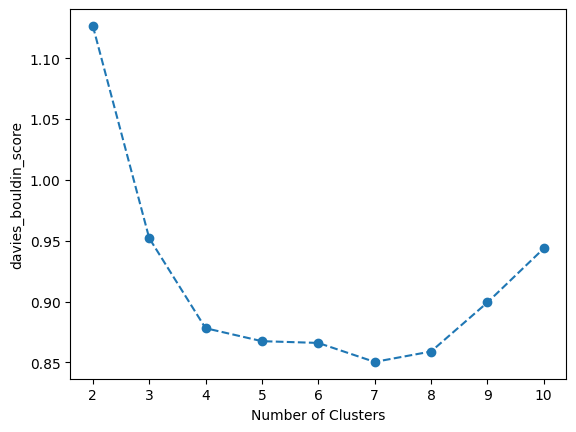

In [348]:
plt.plot(np.arange(2,11), dv_score_set, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('davies_bouldin_score')
plt.show()

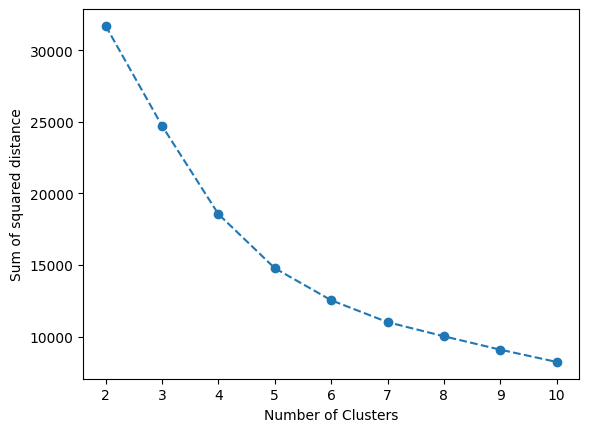

In [350]:
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

In [134]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(new_card_df)

KMeans(n_clusters=4, random_state=42)

In [135]:
df_customers_kmeans = new_card_df.copy()
df_customers_kmeans['Segment'] = kmeans.labels_  # It will contain the predicted clusters for each observation in our data set
df_customers_kmeans

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CASH_ADVANCE  \
0       40.900749      95.40             0.166667      0.000000   
1     3202.467416       0.00             0.000000   6442.945483   
2     2495.148862     773.17             1.000000      0.000000   
3     1666.670542    1499.00             0.083333    205.788017   
4      817.714335      16.00             0.083333      0.000000   
...           ...        ...                  ...           ...   
8945    28.493517     291.12             1.000000      0.000000   
8946    19.183215     300.00             1.000000      0.000000   
8947    23.398673     144.40             0.833333      0.000000   
8948    13.457564       0.00             0.000000     36.558778   
8949   372.708075    1093.25             0.666667    127.040008   

      CASH_ADVANCE_FREQUENCY  TENURE  CREDIT_LIMIT  Segment  
0                   0.000000      12        1000.0        0  
1                   0.250000      12        7000.0        3  
2                   0.000000      12        7500.0        1  
3                   0.083333      12        7500.0        1  
4                   0.000000      12        1200.0        0  
...                      ...     ...           ...      ...  
8945                0.000000       6        1000.0        0  
8946                0.000000       6        1000.0        0  
8947                0.000000       6        1000.0        0  
8948                0.166667       6         500.0        0  
8949                0.333333       6        1200.0        0  

[8950 rows x 8 columns]

In [114]:
df_customers_kmeans.groupby('Segment').mean().round(3)

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CASH_ADVANCE  \
Segment                                                           
0        3149.650   3243.754                0.724       504.537   
1         777.118    522.400                0.451       490.465   
2        6079.035    677.515                0.320      6286.265   
3        1711.199   1310.860                0.558       810.510   
4        5629.788  25434.970                0.907       887.423   

         CASH_ADVANCE_FREQUENCY  TENURE  CREDIT_LIMIT  
Segment                                                
0                         0.076  11.854     12760.563  
1                         0.110  11.367      2104.638  
2                         0.466  11.478      9497.324  
3                         0.122  11.768      6325.645  
4                         0.034  11.897     16106.897

In [136]:
df_customers_kmeans.value_counts('Segment')

Segment
0    5423
1    2440
3     658
2     429
dtype: int64

---

In [137]:
pca_scores = pca.transform(scaled_card_df)

In [351]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=5, random_state=42)

In [352]:
df_segm_pca = pd.concat([new_card_df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-3:] = ['component 1', 'component 2', 'component 3']
df_segm_pca['K-means PCA'] = kmeans_pca.labels_

df_segm_pca

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CASH_ADVANCE  \
0       40.900749      95.40             0.166667      0.000000   
1     3202.467416       0.00             0.000000   6442.945483   
2     2495.148862     773.17             1.000000      0.000000   
3     1666.670542    1499.00             0.083333    205.788017   
4      817.714335      16.00             0.083333      0.000000   
...           ...        ...                  ...           ...   
8945    28.493517     291.12             1.000000      0.000000   
8946    19.183215     300.00             1.000000      0.000000   
8947    23.398673     144.40             0.833333      0.000000   
8948    13.457564       0.00             0.000000     36.558778   
8949   372.708075    1093.25             0.666667    127.040008   

      CASH_ADVANCE_FREQUENCY  TENURE  CREDIT_LIMIT  component 1  component 2  \
0                   0.000000      12        1000.0    -1.215316    -0.904279   
1                   0.250000      12        7000.0     2.565358    -0.826168   
2                   0.000000      12        7500.0    -0.291296     1.366423   
3                   0.083333      12        7500.0     0.198437     0.197806   
4                   0.000000      12        1200.0    -0.961045    -0.938272   
...                      ...     ...           ...          ...          ...   
8945                0.000000       6        1000.0    -1.528424    -0.959933   
8946                0.000000       6        1000.0    -1.530582    -0.958311   
8947                0.000000       6        1000.0    -1.456591    -1.214846   
8948                0.166667       6         500.0    -0.703175    -2.602892   
8949                0.333333       6        1200.0    -0.378930    -1.547477   

      component 3  K-means PCA  
0       -0.681184            4  
1       -0.693506            2  
2       -0.131150            1  
3       -0.680704            4  
4       -0.780071            4  
...           ...          ...  
8945     4.046335            0  
8946     4.047643            0  
8947     3.900802            0  
8948     3.335248            0  
8949     4.043307            0  

[8950 rows x 11 columns]

In [353]:
df_segm_pca.groupby(['K-means PCA']).mean().round(2)

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CASH_ADVANCE  \
K-means PCA                                                          
0             792.60     442.23                 0.44       1011.71   
1             688.04    1118.12                 0.78         86.97   
2            5241.50     590.58                 0.29       5174.28   
3            3579.01    5383.28                 0.91        588.61   
4            1223.81     178.01                 0.13        832.29   

             CASH_ADVANCE_FREQUENCY  TENURE  CREDIT_LIMIT  component 1  \
K-means PCA                                                              
0                              0.19    7.46       2406.04        -0.21   
1                              0.02   11.91       3994.79        -0.93   
2                              0.49   11.63       8536.56         3.40   
3                              0.08   11.96      10591.73         0.79   
4                              0.16   11.88       3032.96        -0.07   

             component 2  component 3  
K-means PCA                            
0                  -1.41         2.73  
1                   0.54        -0.08  
2                  -0.23        -0.15  
3                   2.87         0.35  
4                  -0.85        -0.58

In [354]:
df_segm_pca.value_counts('K-means PCA')

K-means PCA
1    3567
4    3076
2     922
0     720
3     665
dtype: int64

In [355]:
df_segm_pca.value_counts('TENURE')

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
dtype: int64

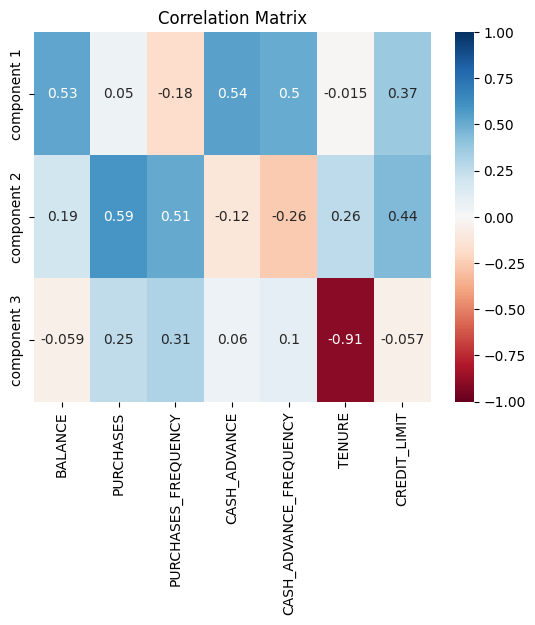

In [146]:
pca = PCA(n_components=3)
pca.fit(scaled_card_df)

df_pca_components = pd.DataFrame(
    data=pca.components_.round(4),
    columns=scaled_card_df.columns.values,
    index=['component 1', 'component 2', 'component 3'])

s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

In [149]:
import plotly.graph_objects as go

In [365]:
df_segm_pca['before-outlier-cluster'] = df_segm_pca['K-means PCA'].apply(lambda x : 'cluster_' + str(x+1))

In [414]:
fig = px.scatter_3d(df_segm_pca, x='component 1', y='component 2', z='component 3',
              color='before-outlier-cluster', hover_data=['K-means PCA'], symbol='K-means PCA')
fig.update_traces(marker_size = 2)

In [391]:
df_segm_pca.groupby('before-outlier-cluster').mean().reset_index().iloc[:, -4:-1].round(2)

component 1  component 2  component 3
0        -0.21        -1.41         2.73
1        -0.93         0.54        -0.08
2         3.40        -0.23        -0.15
3         0.79         2.87         0.35
4        -0.07        -0.85        -0.58

In [158]:
pca_scores

array([[-1.21531644, -0.90427882, -0.68118408],
       [ 2.56535755, -0.82616777, -0.69350601],
       [-0.29129579,  1.36642327, -0.13115006],
       ...,
       [-1.45659054, -1.21484628,  3.90080234],
       [-0.70317485, -2.60289213,  3.33524821],
       [-0.37893   , -1.54747703,  4.04330717]])

In [159]:
from sklearn.cluster import DBSCAN

In [399]:
df_segm_pca.head()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CASH_ADVANCE  \
0    40.900749      95.40             0.166667      0.000000   
1  3202.467416       0.00             0.000000   6442.945483   
2  2495.148862     773.17             1.000000      0.000000   
3  1666.670542    1499.00             0.083333    205.788017   
4   817.714335      16.00             0.083333      0.000000   

   CASH_ADVANCE_FREQUENCY  TENURE  CREDIT_LIMIT  component 1  component 2  \
0                0.000000      12        1000.0    -1.215316    -0.904279   
1                0.250000      12        7000.0     2.565358    -0.826168   
2                0.000000      12        7500.0    -0.291296     1.366423   
3                0.083333      12        7500.0     0.198437     0.197806   
4                0.000000      12        1200.0    -0.961045    -0.938272   

   component 3  K-means PCA before-outlier-cluster  
0    -0.681184            4              cluster_5  
1    -0.693506            2              cluster_3  
2    -0.131150            1              cluster_2  
3    -0.680704            4              cluster_5  
4    -0.780071            4              cluster_5

In [410]:
group1 = df_segm_pca[df_segm_pca['K-means PCA'] == 3].iloc[:, -5: -2]
fig = px.scatter_3d(group1, x='component 1', y='component 2', z='component 3')
fig.update_traces(marker_size = 1)
fig.show()

# dbscan_df1 = DBSCAN(eps = 0.7, min_samples = 5)
# dbscan_df1.fit(group1)
# print(set(dbscan_df1.labels_))



In [401]:
df_segm_pca.value_counts('before-outlier-cluster').sort_index()

before-outlier-cluster
cluster_1     720
cluster_2    3567
cluster_3     922
cluster_4     665
cluster_5    3076
dtype: int64

In [412]:
for cluster in range(5):
    sliced_col =   df_segm_pca[df_segm_pca['K-means PCA'] == cluster].iloc[:, -5: -2]
    fig = px.scatter_3d(sliced_col, x='component 1', y='component 2', z='component 3',
                        color_continuous_scale= 'dodgerblue')
    fig.update_traces(marker_size = 2)
    fig.show()

In [419]:
selected_epsilon = []
outlier_index = []
for cluster in range(5):
    sliced_col =   df_segm_pca[df_segm_pca['K-means PCA'] == cluster].iloc[:, -5: -2]
    # fig = px.scatter_3d(sliced_col, x='component 1', y='component 2', z='component 3')
    # fig.update_traces(marker_size = 5)
    # fig.show()
    initial_epsilon = 0.3
    threshold_class = 2
    dbscan_df = DBSCAN(eps = initial_epsilon, min_samples = 5)
    dbscan_df.fit(sliced_col)
    
    while len(set(dbscan_df.labels_)) > threshold_class:
        # print("yes")
        initial_epsilon += 0.05
        dbscan_df = DBSCAN(eps = initial_epsilon, min_samples = 5)
        dbscan_df.fit(sliced_col)
    selected_epsilon.append(initial_epsilon)
    fig = px.scatter_3d(sliced_col, x='component 1', y='component 2', z='component 3',
                        color =dbscan_df.labels_ , color_continuous_scale= ['grey', 'dodgerblue'])
    fig.update_traces(marker_size = 3)
    fig.show()
    
    outlier_index.extend(sliced_col[dbscan_df.labels_ == -1].index)
# print(set(dbscan_df1.labels_))
    

In [428]:
selected_epsilon

[0.44999999999999996,
 0.35,
 0.9000000000000002,
 0.7000000000000001,
 0.44999999999999996]

In [420]:
new_df_segm_pca = df_segm_pca.copy()
new_df_segm_pca['segmentation'] =new_df_segm_pca['K-means PCA']
new_df_segm_pca['segmentation'].iloc[outlier_index] = -1


/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_51009/1043690139.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [422]:
new_df_segm_pca.groupby('segmentation').count()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CASH_ADVANCE  \
segmentation                                                          
-1                183        183                  183           183   
 0                639        639                  639           639   
 1               3550       3550                 3550          3550   
 2                886        886                  886           886   
 3                619        619                  619           619   
 4               3073       3073                 3073          3073   

              CASH_ADVANCE_FREQUENCY  TENURE  CREDIT_LIMIT  component 1  \
segmentation                                                              
-1                               183     183           183          183   
 0                               639     639           639          639   
 1                              3550    3550          3550         3550   
 2                               886     886           886          886   
 3                               619     619           619          619   
 4                              3073    3073          3073         3073   

              component 2  component 3  K-means PCA  before-outlier-cluster  
segmentation                                                                 
-1                    183          183          183                     183  
 0                    639          639          639                     639  
 1                   3550         3550         3550                    3550  
 2                    886          886          886                     886  
 3                    619          619          619                     619  
 4                   3073         3073         3073                    3073

In [426]:
new_df_segm_pca[new_df_segm_pca.segmentation == -1].groupby('before-outlier-cluster').count()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CASH_ADVANCE  \
before-outlier-cluster                                                          
cluster_1                    81         81                   81            81   
cluster_2                    17         17                   17            17   
cluster_3                    36         36                   36            36   
cluster_4                    46         46                   46            46   
cluster_5                     3          3                    3             3   

                        CASH_ADVANCE_FREQUENCY  TENURE  CREDIT_LIMIT  \
before-outlier-cluster                                                 
cluster_1                                   81      81            81   
cluster_2                                   17      17            17   
cluster_3                                   36      36            36   
cluster_4                                   46      46            46   
cluster_5                                    3       3             3   

                        component 1  component 2  component 3  K-means PCA  \
before-outlier-cluster                                                       
cluster_1                        81           81           81           81   
cluster_2                        17           17           17           17   
cluster_3                        36           36           36           36   
cluster_4                        46           46           46           46   
cluster_5                         3            3            3            3   

                        segmentation  
before-outlier-cluster                
cluster_1                         81  
cluster_2                         17  
cluster_3                         36  
cluster_4                         46  
cluster_5                          3

In [434]:
new_df_segm_pca[new_df_segm_pca.segmentation != 0].groupby('before-outlier-cluster').count()

BALANCE  PURCHASES  PURCHASES_FREQUENCY  CASH_ADVANCE  \
before-outlier-cluster                                                          
cluster_1                    81         81                   81            81   
cluster_2                  3567       3567                 3567          3567   
cluster_3                   922        922                  922           922   
cluster_4                   665        665                  665           665   
cluster_5                  3076       3076                 3076          3076   

                        CASH_ADVANCE_FREQUENCY  TENURE  CREDIT_LIMIT  \
before-outlier-cluster                                                 
cluster_1                                   81      81            81   
cluster_2                                 3567    3567          3567   
cluster_3                                  922     922           922   
cluster_4                                  665     665           665   
cluster_5                                 3076    3076          3076   

                        component 1  component 2  component 3  K-means PCA  \
before-outlier-cluster                                                       
cluster_1                        81           81           81           81   
cluster_2                      3567         3567         3567         3567   
cluster_3                       922          922          922          922   
cluster_4                       665          665          665          665   
cluster_5                      3076         3076         3076         3076   

                        segmentation  
before-outlier-cluster                
cluster_1                         81  
cluster_2                       3567  
cluster_3                        922  
cluster_4                        665  
cluster_5                       3076

In [438]:
new_df_segm_pca.value_counts('before-outlier-cluster').sort_index()

before-outlier-cluster
cluster_1     720
cluster_2    3567
cluster_3     922
cluster_4     665
cluster_5    3076
dtype: int64

In [360]:
fig = px.scatter_3d(new_df_segm_pca, x='component 1', y='component 2', z='component 3',
              color='segmentation', hover_data=['segmentation'], symbol='segmentation')
fig.update_traces(marker_size = 5)

In [305]:
fig = px.scatter(new_df_segm_pca, x='component 1', y='component 2', 
              color='segmentation', hover_data=['segmentation'], symbol='segmentation')
fig.update_traces(marker_size = 5)

In [310]:
fig = px.scatter(new_df_segm_pca, x='component 1', y='component 3', 
              color='segmentation', hover_data=['segmentation'], symbol='segmentation')
fig.update_traces(marker_size = 5)

In [311]:
fig = px.scatter(new_df_segm_pca, x='component 2', y='component 3', 
              color='segmentation', hover_data=['segmentation'], symbol='segmentation')
fig.update_traces(marker_size = 5)

In [444]:
new_df_segm_pca.groupby(['segmentation']).mean().round(2).reset_index()

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_51009/415261512.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



segmentation  BALANCE  PURCHASES  PURCHASES_FREQUENCY  CASH_ADVANCE  \
0            -1  4491.10    5622.59                 0.65       4121.14   
1             0   603.36     393.98                 0.43        762.19   
2             1   687.53    1113.48                 0.78         86.24   
3             2  5132.63     494.17                 0.27       4862.10   
4             3  3304.91    4461.00                 0.91        571.39   
5             4  1223.78     177.66                 0.13        830.46   

   CASH_ADVANCE_FREQUENCY  TENURE  CREDIT_LIMIT  component 1  component 2  \
0                    0.39    9.11       9419.67         2.76         1.37   
1                    0.16    7.47       2027.62        -0.44        -1.44   
2                    0.02   11.92       3977.55        -0.93         0.54   
3                    0.48   11.72       8411.40         3.26        -0.25   
4                    0.07   11.99      10193.70         0.65         2.55   
5                    0.16   11.89       3033.90        -0.07        -0.85   

   component 3  K-means PCA  
0         2.35         1.31  
1         2.70         0.00  
2        -0.08         1.00  
3        -0.24         2.00  
4         0.23         3.00  
5        -0.58         4.00

new_df_segm_pca.groupby(['segmentation']).agg({})

In [439]:
new_df_segm_pca.groupby(['segmentation']).agg({'component 1': ['mean'],
                                               'component 2': ['mean'],
                                               'component 3': ['mean']}).round(2)

component 1 component 2 component 3
                    mean        mean        mean
segmentation                                    
-1                  2.76        1.37        2.35
 0                 -0.44       -1.44        2.70
 1                 -0.93        0.54       -0.08
 2                  3.26       -0.25       -0.24
 3                  0.65        2.55        0.23
 4                 -0.07       -0.85       -0.58

In [432]:
new_df_segm_pca.groupby(['K-means PCA']).agg({'component 1': ['mean'],
                                               'component 2': ['mean'],
                                               'component 3': ['mean']})

component 1 component 2 component 3
                   mean        mean        mean
K-means PCA                                    
0             -0.212489   -1.409504    2.728906
1             -0.925902    0.541190   -0.077284
2              3.400135   -0.230110   -0.151598
3              0.789030    2.873177    0.345753
4             -0.066302   -0.849832   -0.578444

In [443]:
new_df_segm_pca[new_df_segm_pca.segmentation == 0].mean().round(2)

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_51009/1008049135.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



BALANCE                    603.36
PURCHASES                  393.98
PURCHASES_FREQUENCY          0.43
CASH_ADVANCE               762.19
CASH_ADVANCE_FREQUENCY       0.16
TENURE                       7.47
CREDIT_LIMIT              2027.62
component 1                 -0.44
component 2                 -1.44
component 3                  2.70
K-means PCA                  0.00
segmentation                 0.00
dtype: float64

In [312]:
new_df_segm_pca.value_counts('segmentation')

segmentation
 1    5271
 3    1646
 2    1215
 0     649
-1     169
dtype: int64

In [299]:
new_df_segm_pca['segmentation'].iloc[outlier_index] = -1

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_51009/3449741811.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



new_df_segm_pca['segmentation'].apply(lambda)

In [294]:
df_segm_pca.columns

Index(['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE',
       'CASH_ADVANCE_FREQUENCY', 'TENURE', 'CREDIT_LIMIT', 'component 1',
       'component 2', 'component 3', 'K-means PCA'],
      dtype='object')

In [288]:
sliced_col.iloc[dbscan_df.labels_ == -1].index

Int64Index([ 138,  143,  174,  273,  393,  501,  507,  548,  550,  587,  591,
             622,  643,  652,  669,  708,  941,  970, 1061, 1190, 1256, 1447,
            1560, 1585, 1604, 1641, 1991, 2823, 2970, 3181, 3652, 3668, 3698,
            3937, 4282, 4790, 5260, 5347, 5744, 7046],
           dtype='int64')

In [1]:
print("You drive me crazy")

You drive me crazy


---